In [1]:
%matplotlib notebook
import pylab as plt
import numpy as np
import h5py
import astropy
from astropy.io import fits

In [2]:
f = h5py.File('ares_fcoll_4d.hdf5','r')

In [58]:
eor_signals = f['blobs']['dTb'].value
eor_z = f['blobs']['dTb'].attrs.get('ivar')[0]
fqs = 1420. / (1 + all_z)
eor_signals = 1e-3 * eor_signals[:,::-1] # make K
fqs = fqs[::-1]

<IPython.core.display.Javascript object>


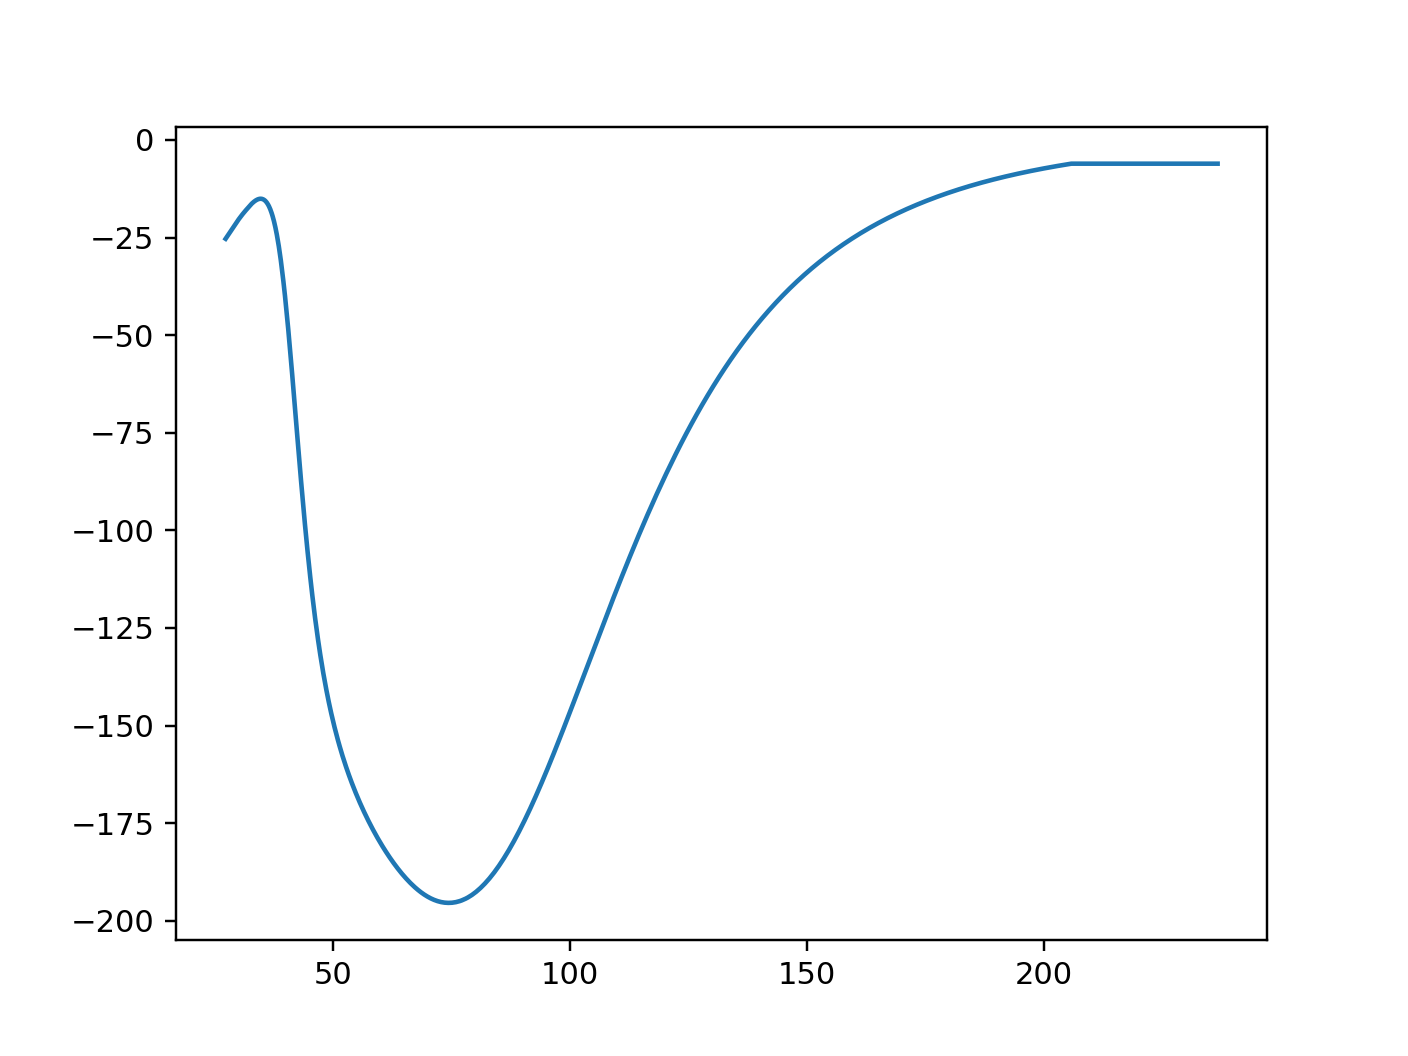

In [53]:
plt.figure()
plt.plot(fqs, eor_signals[0])
plt.show()

<IPython.core.display.Javascript object>


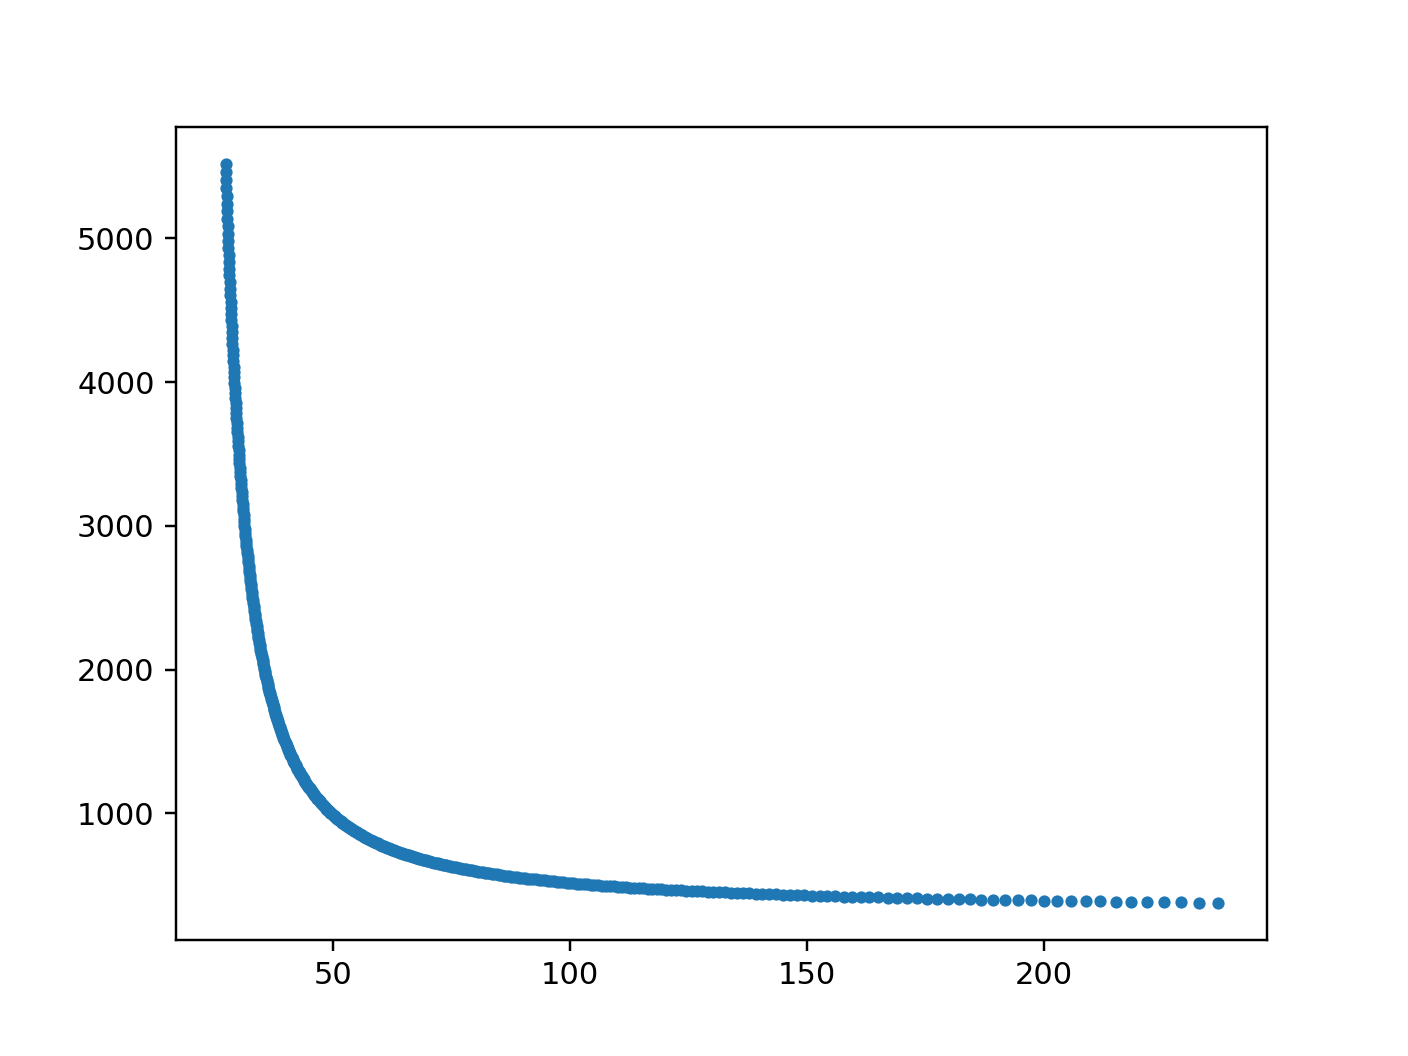

In [59]:
file1 = fits.open('Anttemp-OVRO-230mins-230freqs-50to100MHz.fits')
file2 = fits.open('Anttemp-OVRO-230mins-230freqs-101to150MHz.fits')
fg_data = np.hstack([file1[0].data, file2[0].data*1.01962])
#fg_poly = np.polyfit(np.log10(fqs), np.log10(fg_data[0]), deg=1)
#fg_mdl = 10**np.polyval(fg_poly, np.log10(fqs))
#eor_poly = np.polyfit(np.log10(fqs), np.log10(all_signals[0]*1e-3+fg_data[0]), deg=1)
#eor_mdl = 10**np.polyval(eor_poly, np.log10(fqs))
plt.figure()
plt.plot(fqs, fg_data[0], '.')
#plt.plot(fqs, fg_mdl, 'r')
#plt.plot(fqs, all_signals[0], 'k')
#plt.plot(fqs, eor_mdl, 'b')
plt.show()

(460, 460)


<IPython.core.display.Javascript object>


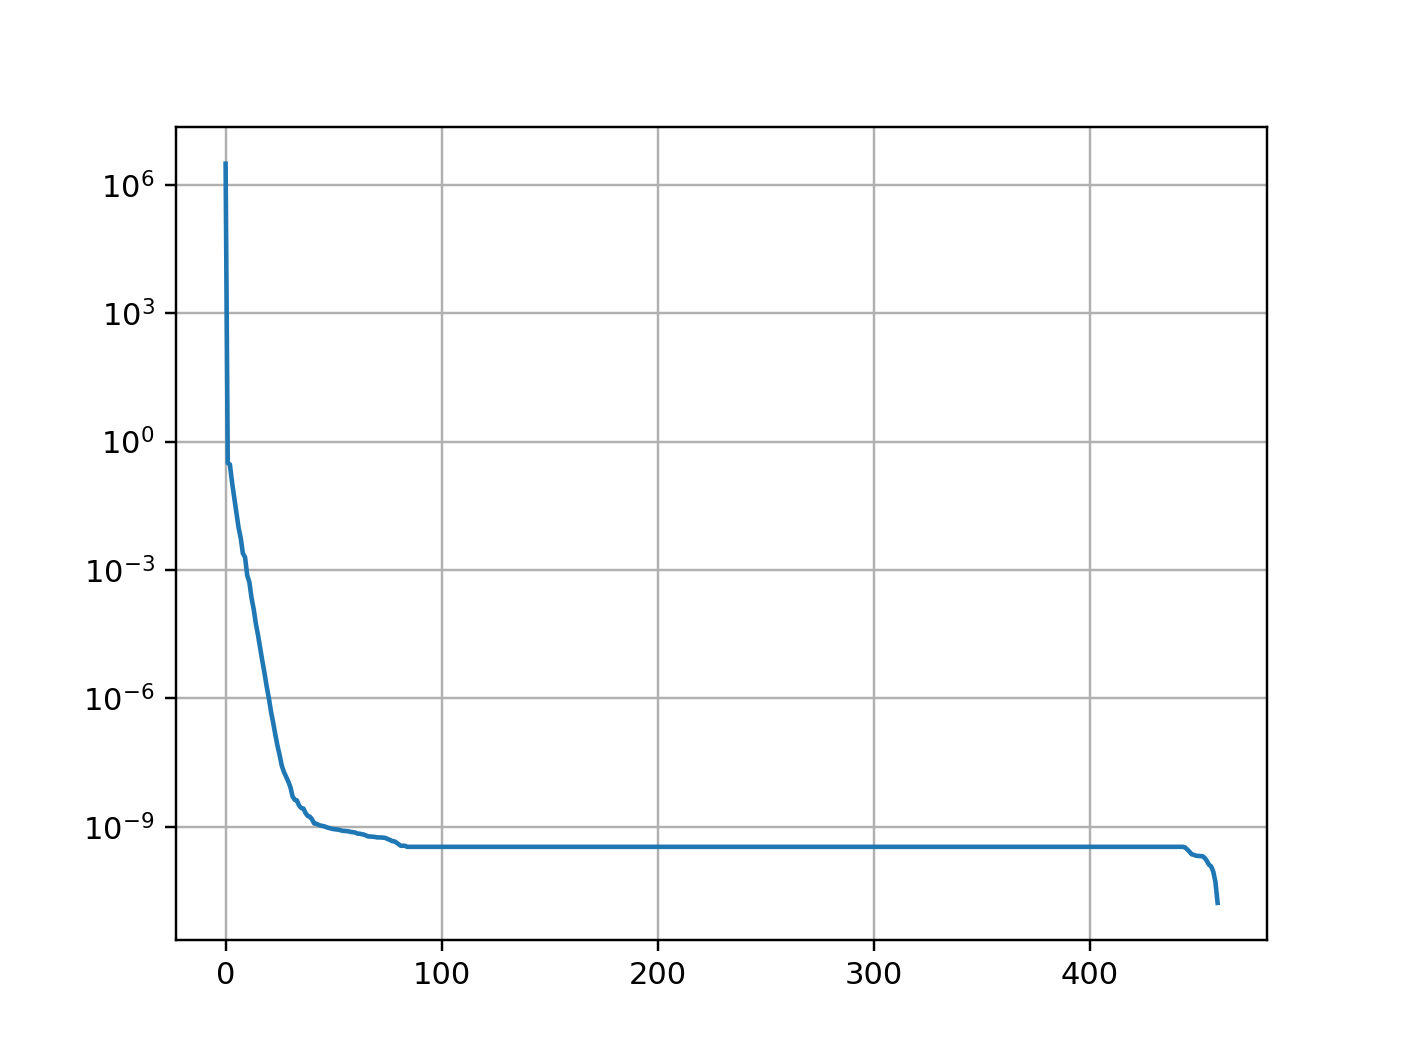

In [60]:
all_sigs = np.vstack([eor_signals, fg_data])
C = np.cov(all_sigs, rowvar=False)
print C.shape
U,S,V = np.linalg.svd(C)
plt.figure()
plt.semilogy(S)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


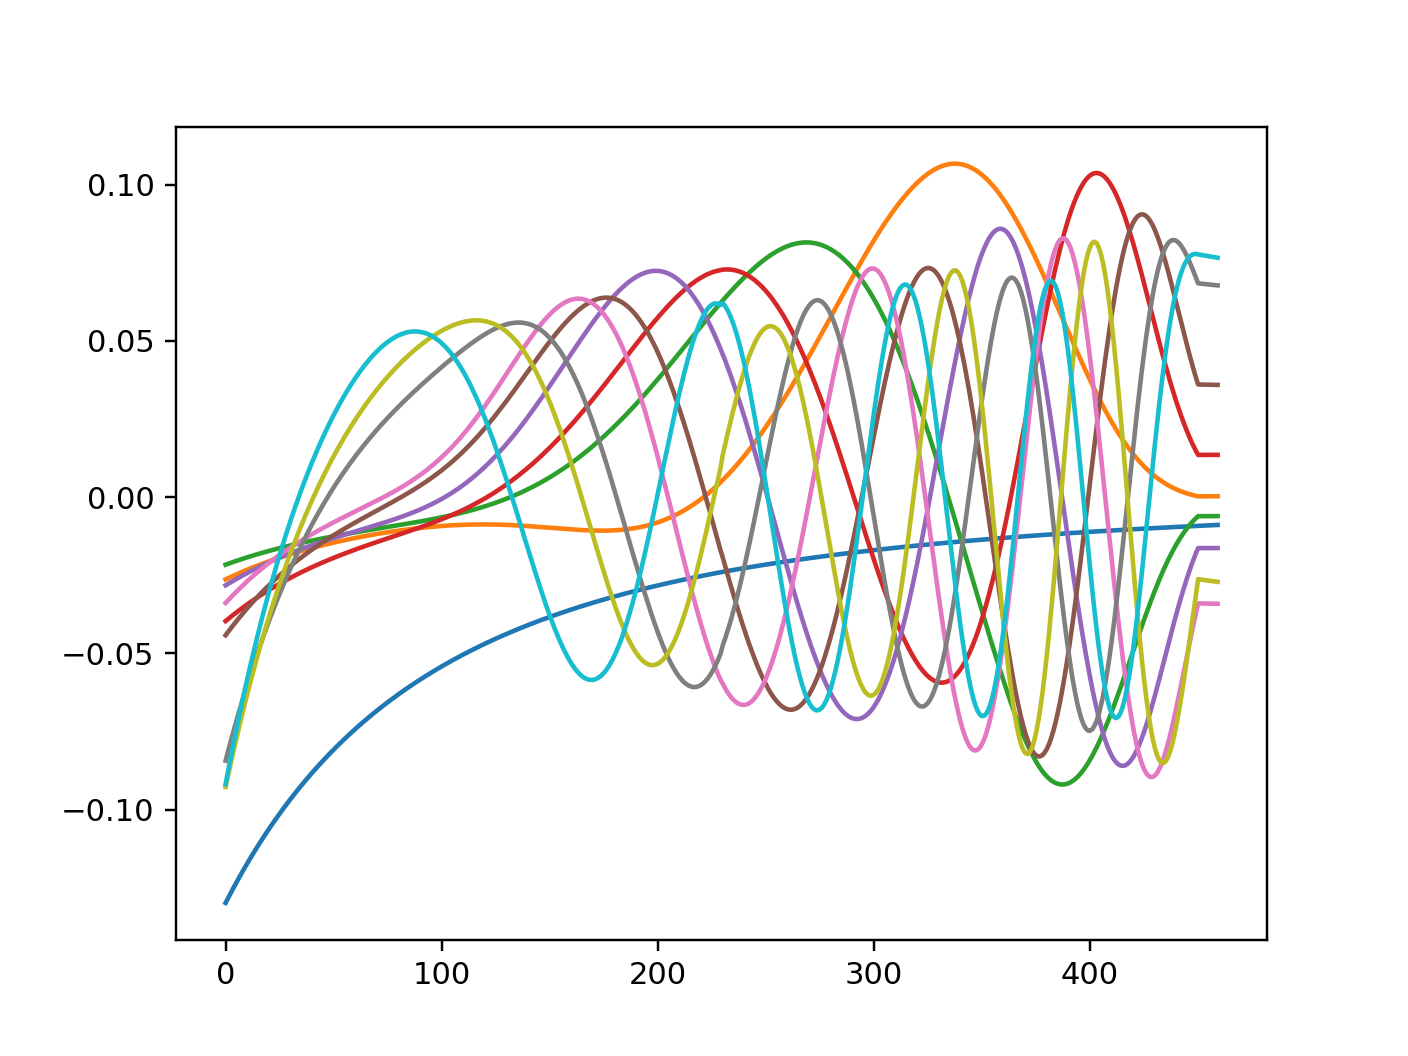

In [61]:
plt.figure()
plt.plot(V[:10].T)
plt.show()

<IPython.core.display.Javascript object>


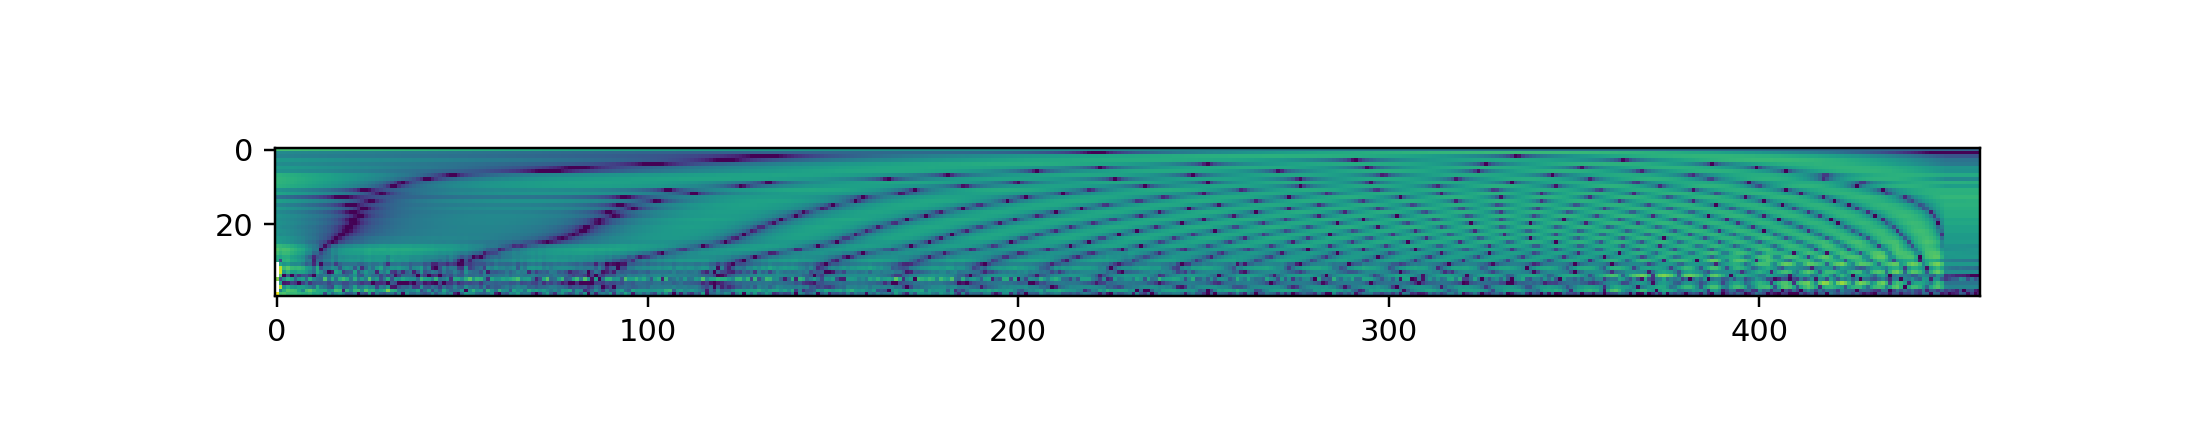

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


In [62]:
plt.figure(figsize=(10,2))
plt.imshow(np.log10(np.abs(V[:40])), vmax=0, vmin=-3)
plt.show()

<IPython.core.display.Javascript object>


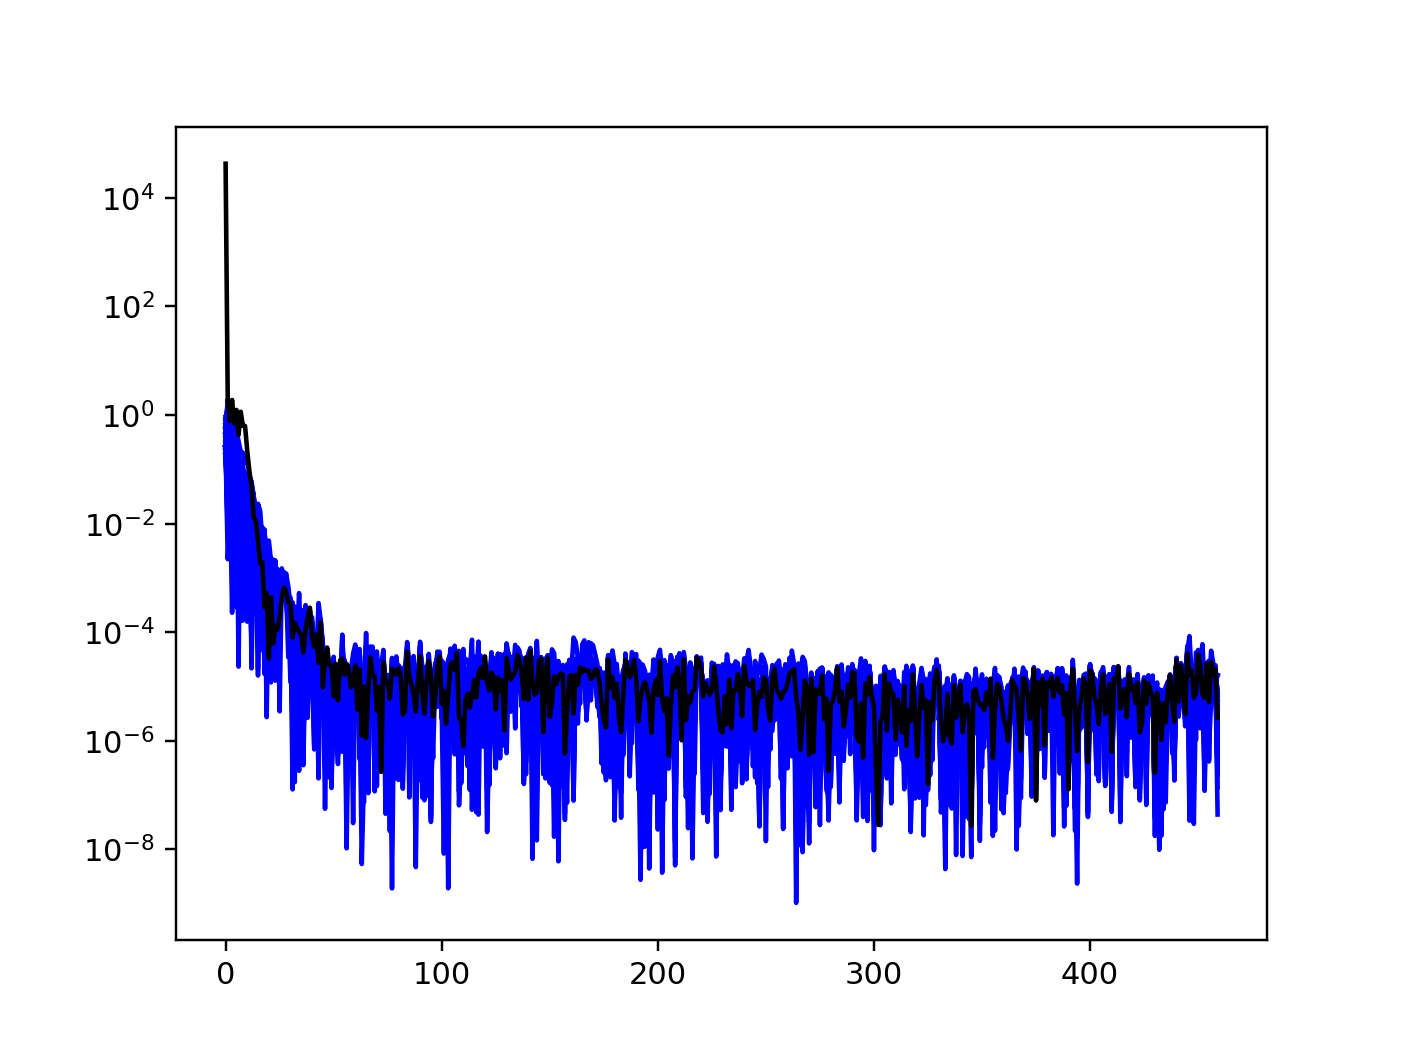

In [70]:
#simple_fg = 180. * (fqs/180.)**-2.5
#simple_fg.shape = (1,-1)
fg_1 = np.dot(fg_data[:1], U)
#fg_6 = np.dot(simple_fg, U)
plt.figure()
#plt.imshow(np.log10(np.abs(fg_e)), vmax=4, vmin=1)
for i in np.random.randint(eor_signals.shape[0],size=100):
    #fg_3 = np.dot(fg_data[:1]+eor_signals[i:i+1], U)
    fg_5 = np.dot(eor_signals[i:i+1], U)
    #plt.plot(np.abs(fg_3[0]), 'g')
    plt.plot(np.abs(fg_5[0]), 'b')
#plt.plot(np.abs(fg_6[0]), 'r')
#plt.plot(S*1e3)
#plt.plot(np.abs(np.dot(all_signals,U)[0])**2)
plt.plot(np.abs(fg_1[0]), 'k')
plt.show()